In [1]:
import pandas as pd
import numpy as np
from py_ball import league,player,league_dash,boxscore
import os
import re, glob, pandas as pd
from pathlib import Path

headers = {
    "User-Agent": (
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/18.3 Safari/605.1.15"
    ),
    "Referer": "https://stats.nba.com/",
    "Accept": "application/json, text/plain, */*",
}

league_id = "00" #nba
players = league_dash.LeagueDash(
    headers=headers,
    endpoint="LeagueDashPlayerStats",
    league_id=league_id,
    season="1996-97",
    
    measure_type="Advanced",
    season_type="Regular Season"

)
m=  pd.DataFrame(players.data["LeagueDashPlayerStats"])
m

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK
0,920,A.C. Green,A.C.,1610612742,DAL,33.0,83,23,60,0.277,...,406,348,372,372,135,152,155,191,199,101
1,243,Aaron McKie,Aaron,1610612765,DET,24.0,83,48,35,0.578,...,351,392,361,361,152,203,196,264,258,302
2,1425,Aaron Williams,Aaron,1610612763,VAN,25.0,33,4,29,0.121,...,280,390,362,362,81,273,302,202,253,8
3,768,Acie Earl,Acie,1610612749,MIL,27.0,47,14,33,0.298,...,91,231,173,173,332,297,281,304,289,381
4,228,Adam Keefe,Adam,1610612762,UTA,27.0,62,48,14,0.774,...,393,280,282,282,213,274,292,320,351,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,335,Willie Anderson,Willie,1610612748,MIA,30.0,28,22,6,0.786,...,354,414,389,389,200,351,356,348,370,169
437,416,Willie Burton,Willie,1610612737,ATL,29.0,24,15,9,0.625,...,136,308,303,303,394,329,320,286,241,403
438,1365,Xavier McDaniel,Xavier,1610612751,NJN,34.0,62,19,43,0.306,...,274,84,90,90,282,220,200,227,203,358
439,212,Yinka Dare,Yinka,1610612751,NJN,24.0,41,12,29,0.293,...,404,83,62,62,419,373,367,426,420,396


In [16]:


players_shot = player.Player(
    headers=headers,
    endpoint="playerdashptshots",
    league_id=league_id,
    season="1996-97"  ,
    season_type="Regular Season"

)
pd.DataFrame(players_shot.data["Overall"])

""


### GETTING ADVANCED AND TRADITIONAL STATISTICS

In [ ]:
### ADVANCED STATISTIC
import os
folder_path = os.getcwd() + "/seasons"
for year1 in range(1996, 2025):
    year2 = str(year1 + 1)[-2:]
    season_formatted = f"{year1}-{year2}"
    file_name = season_formatted + "_advanced_stats.csv"
    file_path = os.path.join(folder_path, file_name)

    # fetch your data…
    players = league_dash.LeagueDash(
        headers=headers,
        endpoint="LeagueDashPlayerStats",
        league_id=league_id,
        season=season_formatted,
        measure_type="Advanced",
        season_type="Regular Season"
    )
    data = pd.DataFrame(players.data["LeagueDashPlayerStats"])

    try:
        data.to_csv(file_path, index=False)
    except OSError as e:
        print(f"Could not write {file_name}: {e}")


In [ ]:

SOURCE_DIR = Path("seasons")     # ← folder holding your CSVs
OUT_FILE   = Path("seasons/all_seasons_advanced_stats.csv")

pat = re.compile(r"(\d{4})-(\d{2})")   # captures 2011 and 12 in 2011-12
frames = []

for f in glob.glob(str(SOURCE_DIR / "*_advanced_stats.csv")):
    m = pat.search(Path(f).name)
    if not m:
        print(f"⚠️ skipped (no season pattern): {f}")
        continue

    start_year = int(m.group(1))        # 2011
    end_year   = start_year + 1         # 2012  ← what you asked for

    df = pd.read_csv(f, low_memory=False)
    df["season"] = end_year             # add full 4-digit season
    frames.append(df)

merged = pd.concat(frames, ignore_index=True)
merged.to_csv(OUT_FILE, index=False)
print(f"✅ {len(merged):,} rows written → {OUT_FILE}")

a = pd.read_csv("seasons/all_seasons_advanced_stats.csv")
filtered = a[['PLAYER_NAME','TEAM_ABBREVIATION',
        'GP', 'W_PCT', 'MIN',  'OFF_RATING',
        'DEF_RATING',
        'NET_RATING','AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT','DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT','USG_PCT', 'PACE', 
       'PIE', 'POSS', 'FGM_PG', 'FGA_PG', 'FG_PCT',"season"]]

filtered.to_csv("seasons/all_seasons_advanced_filtered.csv")


In [16]:
#TRADITIONAL STATISTICS

folder_path = os.getcwd() + "/seasons"
for year1 in range(1996, 2025):
    year2 = str(year1 + 1)[-2:]
    season_formatted = f"{year1}-{year2}"
    file_name = season_formatted + "_traditional_stats.csv"
    file_path = os.path.join(folder_path, file_name)

    league_id = '00'  # NBA
    players = league_dash.LeagueDash(
        headers=headers,
        endpoint="LeagueDashPlayerStats",
        league_id=league_id,
        season=season_formatted,
        measure_type="Base",
        season_type="Regular Season"

    )
    data = pd.DataFrame(players.data["LeagueDashPlayerStats"])
    try:
        data.to_csv(file_path, index=False)
    except OSError as e:
        print(f"Could not write {file_name}: {e}")

In [17]:


SOURCE_DIR = Path("seasons")     # ← folder holding your CSVs
OUT_FILE   = Path("seasons/all_seasons_traditional_stats.csv")

pat = re.compile(r"(\d{4})-(\d{2})")   # captures 2011 and 12 in 2011-12
frames = []

for f in glob.glob(str(SOURCE_DIR / "*_traditional_stats.csv")):
    m = pat.search(Path(f).name)
    if not m:
        print(f"⚠️ skipped (no season pattern): {f}")
        continue

    start_year = int(m.group(1))        # 2011
    end_year   = start_year + 1         # 2012  ← what you asked for

    df = pd.read_csv(f, low_memory=False)
    df["season"] = end_year             # add full 4-digit season
    frames.append(df)

merged = pd.concat(frames, ignore_index=True)
merged.to_csv(OUT_FILE, index=False)
print(f"✅ {len(merged):,} rows written → {OUT_FILE}")

✅ 13,987 rows written → seasons/all_seasons_traditional_stats.csv


In [18]:
all_seasons_traditional = pd.read_csv("seasons/all_seasons_traditional_stats.csv")
all_seasons_traditional

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,season
0,201985,AJ Price,AJ,1610612750,MIN,27.0,28,15,13,0.536,...,451,473,468,443,208,468,234,27,462,2014
1,201166,Aaron Brooks,Aaron,1610612743,DEN,29.0,72,42,30,0.583,...,139,187,208,184,305,215,140,27,191,2014
2,201189,Aaron Gray,Aaron,1610612758,SAC,29.0,37,12,25,0.324,...,282,269,414,436,368,393,234,27,393,2014
3,203519,Adonis Thomas,Adonis,1610612755,PHI,21.0,6,2,4,0.333,...,371,389,439,409,125,452,234,27,447,2014
4,1733,Al Harrington,Al,1610612764,WAS,34.0,34,20,14,0.588,...,265,168,255,244,123,316,234,27,286,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13982,203186,Willie Reed,Willie,1610612751,BKN,26.0,39,8,31,0.205,...,348,366,188,330,359,334,233,25,345,2016
13983,204098,Xavier Munford,Xavier,1610612763,MEM,24.0,14,3,11,0.214,...,145,238,286,294,347,287,233,25,286,2016
13984,203897,Zach LaVine,Zach,1610612750,MIN,21.0,82,29,53,0.354,...,71,100,155,78,420,123,233,25,108,2016
13985,2216,Zach Randolph,Zach,1610612763,MEM,34.0,68,37,31,0.544,...,19,137,76,59,211,71,39,13,76,2016


In [22]:
trad_columns = ["PLAYER_NAME","TEAM_ID","GP","W","L","MIN","FGM","FGA","FG3M","FG3A","FTM","FTA","OREB","DREB","REB","AST","TOV","STL","BLK","BLKA","PF","PFD","PTS","season"]
traditional_stats_filtered = all_seasons_traditional[trad_columns]
traditional_stats_filtered

,PLAYER_NAME,TEAM_ID,GP,W,L,MIN,FGM,FGA,FG3M,FG3A,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,season
0,AJ Price,1610612750,28,15,13,3.5,0.7,1.6,0.2,0.8,...,0.4,0.5,0.3,0.0,0.0,0.0,0.2,0.1,1.6,2014
1,Aaron Brooks,1610612743,72,42,30,21.6,3.2,8.1,1.3,3.4,...,1.9,3.2,1.6,0.7,0.2,0.5,2.0,1.5,9.0,2014
2,Aaron Gray,1610612758,37,12,25,9.6,0.7,1.6,0.0,0.0,...,3.0,0.6,0.8,0.3,0.2,0.3,1.7,0.4,1.8,2014
3,Adonis Thomas,1610612755,6,2,4,6.3,1.0,2.3,0.2,0.8,...,0.5,0.5,0.2,0.0,0.0,0.2,1.0,0.3,2.3,2014
4,Al Harrington,1610612764,34,20,14,15.0,2.4,6.1,1.0,2.9,...,2.4,0.8,1.0,0.4,0.0,0.3,2.1,1.2,6.6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13982,Willie Reed,1610612751,39,8,31,10.9,1.9,3.4,0.0,0.0,...,3.1,0.3,0.4,0.2,0.8,0.2,1.2,1.6,4.7,2016
13983,Xavier Munford,1610612763,14,3,11,17.4,2.3,5.5,0.6,1.6,...,2.2,1.6,1.1,0.9,0.2,0.5,1.8,1.1,5.7,2016
13984,Zach LaVine,1610612750,82,29,53,28.0,5.3,11.7,1.5,3.9,...,2.8,3.1,1.9,0.8,0.2,0.7,2.4,1.9,14.0,2016
13985,Zach Randolph,1610612763,68,37,31,29.7,6.3,13.3,0.1,0.4,...,7.8,2.1,1.5,0.6,0.2,1.1,2.1,2.8,15.3,2016


### GETTING THE SCALLED ALL-SEASON TABLES

In [66]:
from sklearn.preprocessing import StandardScaler 

SOURCE_DIR = Path("seasons")
OUT_FILE   = Path("seasons_scaled/all_seasons_traditional_stats_scaled.csv")
pat        = re.compile(r"(\d{4})-(\d{2})")        # grabs 2011 from 2011-12
frames     = []

for f in glob.glob(str(SOURCE_DIR / "*_traditional_stats.csv")):
    m = pat.search(Path(f).name)
    if not m:
        print(f"⚠️ skipped (no season pattern): {f}")
        continue

    start_year = int(m.group(1))           # e.g. 2011-12 → 2011
    end_year   = start_year + 1            # → 2012  (the “season” label)

    df = pd.read_csv(f, low_memory=False)

    # -------- pick numeric feature columns to scale --------
    # drop IDs or anything you don’t want transformed
    id_like = {"PLAYER_ID", "TEAM_ID", "GAME_ID","PLAYER_NAME","AGE","GP","W","L","W_PCT","MIN"} & set(df.columns)
    numeric_cols = (
        df.select_dtypes(include=[np.number])
          .columns.difference(id_like)
    )

    # -------- scale within-season --------
    scaler = StandardScaler()              # or MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # -------- add season label & stash --------
    df["season"] = end_year
    frames.append(df)

# -------- merge all seasons --------
merged = pd.concat(frames, ignore_index=True)
merged.to_csv(OUT_FILE, index=False)
print(f"✅ {len(merged):,} rows written → {OUT_FILE}")

⚠️ skipped (no season pattern): seasons/all_seasons_traditional_stats.csv
✅ 13,987 rows written → seasons_scaled/all_seasons_traditional_stats_scaled.csv


In [67]:
scaled = pd.read_csv("seasons_scaled/all_seasons_traditional_stats_scaled.csv")
scaled

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,season
0,201985,AJ Price,AJ,1610612750,MIN,27.0,28,15,13,0.536,...,1.535331,1.670003,1.635575,1.451621,-0.239925,1.628001,0.831483,0.233124,1.586065,2014
1,201166,Aaron Brooks,Aaron,1610612743,DEN,29.0,72,42,30,0.583,...,-0.735636,-0.389979,-0.238747,-0.412622,0.457504,-0.190423,-0.418279,0.233124,-0.362735,2014
2,201189,Aaron Gray,Aaron,1610612758,SAC,29.0,37,12,25,0.324,...,0.305224,0.200645,1.246293,1.401236,0.910473,1.088943,0.831483,0.233124,1.089876,2014
3,203519,Adonis Thomas,Adonis,1610612755,PHI,21.0,6,2,4,0.333,...,0.953032,1.064973,1.426516,1.206894,-0.836694,1.513002,0.831483,0.233124,1.478198,2014
4,1733,Al Harrington,Al,1610612764,WAS,34.0,34,20,14,0.588,...,0.181485,-0.526830,0.100073,0.019249,-0.851074,0.535509,0.831483,0.233124,0.320424,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13982,203186,Willie Reed,Willie,1610612751,BKN,26.0,39,8,31,0.205,...,0.811366,0.931030,-0.366504,0.666742,0.877374,0.695025,0.837707,0.222462,0.775408,2016
13983,204098,Xavier Munford,Xavier,1610612763,MEM,24.0,14,3,11,0.214,...,-0.679113,-0.001592,0.348240,0.404598,0.790043,0.352978,0.837707,0.222462,0.345941,2016
13984,203897,Zach LaVine,Zach,1610612750,MIN,21.0,82,29,53,0.354,...,-1.222440,-1.007075,-0.607182,-1.168266,1.321305,-0.840546,0.837707,0.222462,-0.949739,2016
13985,2216,Zach Randolph,Zach,1610612763,MEM,34.0,68,37,31,0.544,...,-1.604237,-0.737489,-1.183353,-1.306620,-0.199705,-1.218980,-1.748107,-3.166082,-1.182671,2016


In [68]:
scaled_filtered = scaled[trad_columns]
scaled_filtered.to_csv("seasons_scaled/all_seasons_traditional_stats_scaled_filtered.csv")

In [69]:
from sklearn.preprocessing import StandardScaler 

SOURCE_DIR = Path("seasons")
OUT_FILE   = Path("seasons_scaled/all_seasons_advanced_stats_scaled.csv")
pat        = re.compile(r"(\d{4})-(\d{2})")        # grabs 2011 from 2011-12
frames     = []

for f in glob.glob(str(SOURCE_DIR / "*_advanced_stats.csv")):
    m = pat.search(Path(f).name)
    if not m:
        print(f"⚠️ skipped (no season pattern): {f}")
        continue

    start_year = int(m.group(1))           # e.g. 2011-12 → 2011
    end_year   = start_year + 1            # → 2012  (the “season” label)

    df = pd.read_csv(f, low_memory=False)

    # -------- pick numeric feature columns to scale --------
    # drop IDs or anything you don’t want transformed
    id_like = {"PLAYER_ID", "TEAM_ID", "GAME_ID","PLAYER_NAME","AGE","GP","W","L","W_PCT","MIN"} & set(df.columns)
    numeric_cols = (
        df.select_dtypes(include=[np.number])
          .columns.difference(id_like)
    )

    # -------- scale within-season --------
    scaler = StandardScaler()              # or MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # -------- add season label & stash --------
    df["season"] = end_year
    frames.append(df)

# -------- merge all seasons --------
merged = pd.concat(frames, ignore_index=True)
merged.to_csv(OUT_FILE, index=False)
print(f"✅ {len(merged):,} rows written → {OUT_FILE}")

⚠️ skipped (no season pattern): seasons/all_seasons_advanced_stats.csv
✅ 13,987 rows written → seasons_scaled/all_seasons_advanced_stats_scaled.csv


In [70]:
a = pd.read_csv("seasons_scaled/all_seasons_advanced_stats_scaled.csv")
filtered = a[['PLAYER_NAME','TEAM_ABBREVIATION',
        'GP', 'W_PCT', 'MIN',  'OFF_RATING',
        'DEF_RATING',
        'NET_RATING','AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT','DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT','USG_PCT', 'PACE', 
       'PIE', 'POSS', 'FGM_PG', 'FGA_PG', 'FG_PCT',"season"]]

filtered.to_csv("seasons_scaled/all_seasons_advanced_scaled_filtered.csv")


In [71]:
ss =  pd.read_csv("seasons_scaled/all_seasons_advanced_scaled_filtered.csv",index_col=0)

ss

,PLAYER_NAME,TEAM_ABBREVIATION,GP,W_PCT,MIN,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,...,EFG_PCT,TS_PCT,USG_PCT,PACE,PIE,POSS,FGM_PG,FGA_PG,FG_PCT,season
0,AJ Price,IND,44,0.614,12.9,-0.114105,-0.541366,0.283986,1.411702,1.689805,...,-0.573785,-0.529662,-0.201923,-0.097660,0.262536,-0.621860,-0.836416,-0.652819,-0.999373,2012
1,Aaron Gray,TOR,49,0.347,16.6,-0.444183,0.628530,-0.707048,-0.757885,-0.996896,...,0.577089,0.295434,-0.941608,-1.148412,-0.126551,-0.309145,-0.639806,-0.815890,0.975748,2012
2,Al Harrington,DEN,64,0.563,27.5,1.021364,0.096759,0.620229,-0.467223,-0.673497,...,0.531957,0.398571,1.197483,0.802460,0.468523,1.176436,1.178839,1.234143,0.194627,2012
3,Al Horford,ATL,11,0.636,31.6,1.166598,-0.195715,0.912230,-0.155799,0.209632,...,0.994563,0.971555,-0.141948,-1.357827,1.063597,-0.971320,1.080533,0.605155,1.388627,2012
4,Al Jefferson,UTA,61,0.525,34.0,1.193005,0.402527,0.540593,-0.155799,1.030568,...,0.317579,0.226676,1.537339,-0.351163,1.612896,1.546894,2.702568,2.422230,0.707935,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13982,Willie Anderson,MIA,28,0.786,10.7,0.172010,0.059360,0.079064,0.610863,0.558055,...,0.559343,0.727189,-0.807356,-0.709862,0.134391,-1.018345,-0.891975,-0.936617,0.237174,1997
13983,Willie Burton,ATL,24,0.625,15.9,-0.566065,-0.085469,-0.335144,-0.812587,-1.034840,...,-0.817029,0.020180,0.519795,-0.392163,-1.000109,-0.930120,-0.623255,-0.403073,-1.084222,1997
13984,Xavier McDaniel,NJN,62,0.306,18.9,0.172010,-0.121677,0.182616,-0.506809,-0.434619,...,-0.772630,-0.742941,-0.378584,0.376511,-0.228649,-0.071886,-0.354535,-0.210998,-0.485641,1997
13985,Yinka Dare,NJN,41,0.293,7.7,0.238106,-0.097538,0.219599,-1.265983,-1.346494,...,-1.261020,-1.113279,-1.297381,0.593476,-1.408529,-0.973972,-1.115908,-1.150035,-0.903519,1997


In [89]:
x = pd.read_csv("seasons/all_seasons_advanced_stats.csv")
x.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING', 'OFF_RATING',
       'sp_work_OFF_RATING', 'E_DEF_RATING', 'DEF_RATING',
       'sp_work_DEF_RATING', 'E_NET_RATING', 'NET_RATING',
       'sp_work_NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT',
       'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'E_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'sp_work_PACE',
       'PIE', 'POSS', 'FGM', 'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'E_OFF_RATING_RANK',
       'OFF_RATING_RANK', 'sp_work_OFF_RATING_RANK', 'E_DEF_RATING_RANK',
       'DEF_RATING_RANK', 'sp_work_DEF_RATING_RANK', 'E_NET_RATING_RANK',
       'NET_RATING_RANK', 'sp_work_NET_RATING_RANK', 'AST_PCT_RANK',
       'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK',
       'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'E_TOV_PCT_

In [85]:
ss.columns

Index(['PLAYER_NAME', 'TEAM_ABBREVIATION', 'GP', 'W_PCT', 'MIN', 'OFF_RATING',
       'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'PACE', 'PIE', 'POSS', 'FGM_PG', 'FGA_PG', 'FG_PCT',
       'season'],
      dtype='object')

In [87]:
ss[ss["MIN"]>25].sort_values(by = "PACE",ascending=False)[["PLAYER_NAME","PACE","season"]].head(10)

,PLAYER_NAME,PACE,season
13247,Jeremy Lin,4.223364,2018
7197,Mike Dunleavy,1.880955,2009
7203,Monta Ellis,1.864011,2009
5289,Michael Dickerson,1.785515,2002
7824,Thomas Bryant,1.712944,2021
11048,Stephen Curry,1.707265,2020
6266,Marcus Camby,1.697195,2008
11660,Danny Fortson,1.680011,2001
7492,Elijah Bryant,1.675599,2021
7786,Russell Westbrook,1.672487,2021


RAPTOR STAT BY FIVEFIFTYEIGHT

- raptordaki  2004 advanced stats datasındaki 2003-2004

In [ ]:
hist_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-raptor/historical_RAPTOR_by_player.csv"
df_rap = pd.read_csv(hist_url, low_memory=False)
df_rap[df_rap["season"] >=1996]

df_rap.to_csv("seasons/raptorstats.csv")


In [ ]:
df_rap[df_rap["mp"]>1000].sort_values(by = "pace_impact",ascending=False).head(15)

##raptor offense, raptor defense ve  pace_imp 'i kullanacağım

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
18025,Russell Westbrook,westbru01,2017,6264,2996,7.791657,-0.947939,6.843719,15.306636,13.816333,1.490304,7.872541,-0.819708,7.052833,3.996917
3951,Stephen Curry,curryst01,2017,6963,3239,9.308684,-0.095877,9.212807,20.653304,15.619612,5.033692,9.791555,0.593993,10.385548,3.581550
3950,Stephen Curry,curryst01,2016,7053,3314,10.379411,2.108447,12.487858,26.666873,23.659318,3.007555,10.635103,2.712822,13.347925,3.306111
3949,Stephen Curry,curryst01,2015,7192,3439,8.600890,2.437371,11.038262,25.089873,19.914785,5.175088,8.787715,2.657047,11.444762,3.130309
18028,Russell Westbrook,westbru01,2020,5136,2311,-0.419859,-0.561605,-0.981464,2.127703,2.266213,-0.138509,0.475066,-0.078965,0.396100,3.004096
18023,Russell Westbrook,westbru01,2015,4759,2302,6.093560,-0.487869,5.605691,10.119741,10.119741,0.000000,6.239869,-0.201795,6.038074,2.991530
18026,Russell Westbrook,westbru01,2018,6533,3149,4.340246,0.089067,4.429313,11.841404,12.030682,-0.189278,5.306685,0.349726,5.656411,2.941962
19112,Trae Young,youngtr01,2020,4645,2120,7.051138,-3.334710,3.716428,7.192127,7.192127,0.000000,7.476361,-3.784481,3.691880,2.888762
16814,Brooks Thompson,thompbr01,1997,2054,1055,0.222990,-0.815554,-0.592564,1.195925,1.195925,0.000000,0.610895,-0.639021,-0.028126,2.800973
18027,Russell Westbrook,westbru01,2019,6169,2827,2.541995,-1.110208,1.431787,6.142006,7.063565,-0.921559,2.899443,-0.202907,2.696536,2.660690


           PLAYER_NAME  season  cosine_distance
1260   Khris Middleton    2022         0.024935
3900     Austin Reaves    2025         0.024941
3577      James Harden    2014         0.029324
11951    Steve Francis    2001         0.030869
6608    Gilbert Arenas    2006         0.031211


/Users/ozcankures/Desktop/projeler-genel/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ozcankures/Desktop/projeler-genel/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ozcankures/Desktop/projeler-genel/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


### SHOOTING STATS

In [33]:
from py_ball import league_dash
import pandas as pd

players_scoring = league_dash.LeagueDash(
    headers=headers,
    endpoint="LeagueDashPlayerStats",
    measure_type="Scoring",       # ↤ this reproduces the /players/scoring page
    per_mode="PerGame",           # or "Per100Possessions", "Per36", etc.
    season="2024-25",
    season_type="Regular Season"
)

df = pd.DataFrame(players_scoring.data["LeagueDashPlayerStats"])
df

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PCT_PTS_PAINT_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK
0,1630639,A.J. Lawson,A.J.,1610612761,TOR,24.0,26,14,12,0.538,...,324,230,323,255,243,200,358,352,340,388
1,1631260,AJ Green,AJ,1610612749,MIL,25.0,73,44,29,0.603,...,550,116,437,250,249,36,522,231,220,353
2,1642358,AJ Johnson,AJ,1610612764,WAS,20.0,29,8,21,0.276,...,176,337,216,443,48,424,134,348,325,472
3,203932,Aaron Gordon,Aaron,1610612743,DEN,29.0,51,33,18,0.647,...,263,309,244,349,150,348,210,150,182,79
4,1628988,Aaron Holiday,Aaron,1610612745,HOU,28.0,62,39,23,0.629,...,505,470,83,380,119,350,208,304,297,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,203897,Zach LaVine,Zach,1610612758,SAC,30.0,74,32,42,0.432,...,367,382,171,475,24,463,95,11,16,105
565,1630192,Zeke Nnaji,Zeke,1610612743,DEN,24.0,57,36,21,0.632,...,164,70,483,252,245,107,451,361,371,140
566,1630533,Ziaire Williams,Ziaire,1610612751,BKN,23.0,63,22,41,0.349,...,385,239,314,172,326,146,412,193,172,413
567,1629627,Zion Williamson,Zion,1610612740,NOP,24.0,30,10,20,0.333,...,58,405,148,443,48,492,66,122,179,58


In [3]:
### SHOOTING
import os
import time
folder_path = os.getcwd() + "/shooting"
for year1 in range(1996, 2025):
    year2 = str(year1 + 1)[-2:]
    season_formatted = f"{year1}-{year2}"
    file_name = season_formatted + "_shooting_stats.csv"
    file_path = os.path.join(folder_path, file_name)

    # fetch your data…
    players_scoring = league_dash.LeagueDash(
    headers=headers,
    endpoint="LeagueDashPlayerStats",
    measure_type="Scoring",       # ↤ this reproduces the /players/scoring page
    per_mode="PerGame",           # or "Per100Possessions", "Per36", etc.
    season=season_formatted,
    season_type="Regular Season"
)
    data = pd.DataFrame(players_scoring.data["LeagueDashPlayerStats"])

    try:
        data.to_csv(file_path, index=False)
        
    except OSError as e:
        print(f"Could not write {file_name}: {e}")


In [4]:
from sklearn.preprocessing import StandardScaler 

SOURCE_DIR = Path("shooting")
OUT_FILE   = Path("seasons_scaled/all_seasons_shooting_stats_scaled.csv")
pat        = re.compile(r"(\d{4})-(\d{2})")        # grabs 2011 from 2011-12
frames     = []

for f in glob.glob(str(SOURCE_DIR / "*_shooting_stats.csv")):
    m = pat.search(Path(f).name)
    if not m:
        print(f"⚠️ skipped (no season pattern): {f}")
        continue

    start_year = int(m.group(1))           # e.g. 2011-12 → 2011
    end_year   = start_year + 1            # → 2012  (the “season” label)

    df = pd.read_csv(f, low_memory=False)

    # -------- pick numeric feature columns to scale --------
    # drop IDs or anything you don’t want transformed
    id_like = {"PLAYER_ID", "TEAM_ID", "GAME_ID","PLAYER_NAME","AGE","GP","W","L","W_PCT","MIN"} & set(df.columns)
    numeric_cols = (
        df.select_dtypes(include=[np.number])
          .columns.difference(id_like)
    )

    # -------- scale within-season --------
    scaler = StandardScaler()              # or MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # -------- add season label & stash --------
    df["season"] = end_year
    frames.append(df)

# -------- merge all seasons --------
merged = pd.concat(frames, ignore_index=True)
merged.to_csv(OUT_FILE, index=False)
print(f"✅ {len(merged):,} rows written → {OUT_FILE}")

✅ 13,987 rows written → seasons_scaled/all_seasons_shooting_stats_scaled.csv


In [63]:
shooting_all_scaled = pd.read_csv("seasons_scaled/all_seasons_shooting_stats_scaled.csv")
shooting_all_scaled.columns

#select columns from here
filtered_shooting_stats = shooting_all_scaled[["PLAYER_NAME","season","MIN","PCT_PTS_2PT","PCT_PTS_2PT_MR","PCT_PTS_3PT","PCT_PTS_FB","PCT_PTS_OFF_TOV","PCT_PTS_PAINT","PCT_AST_2PM","PCT_UAST_2PM","PCT_AST_3PM","PCT_UAST_3PM"]]
filtered_shooting_stats.to_csv("seasons_scaled/all_seasons_shooting_stats_scaled_filtered.csv")

In [66]:
filtered_shooting_stats[(filtered_shooting_stats["season"]==2019) &(filtered_shooting_stats["MIN"] >= 17)].sort_values(by ="PCT_PTS_2PT",ascending=False)["PLAYER_NAME"].head(15)

6669           JaVale McGee
6567          Deandre Ayton
6646       Hassan Whiteside
6912           Steven Adams
6764           Kevon Looney
6945       Tristan Thompson
6915         T.J. McConnell
6974    Willie Cauley-Stein
6530           Clint Capela
6880            Robin Lopez
6966         Walt Lemon Jr.
6831      Mitchell Robinson
6814          Mason Plumlee
6773          Kyle Anderson
6542           Damian Jones
Name: PLAYER_NAME, dtype: object

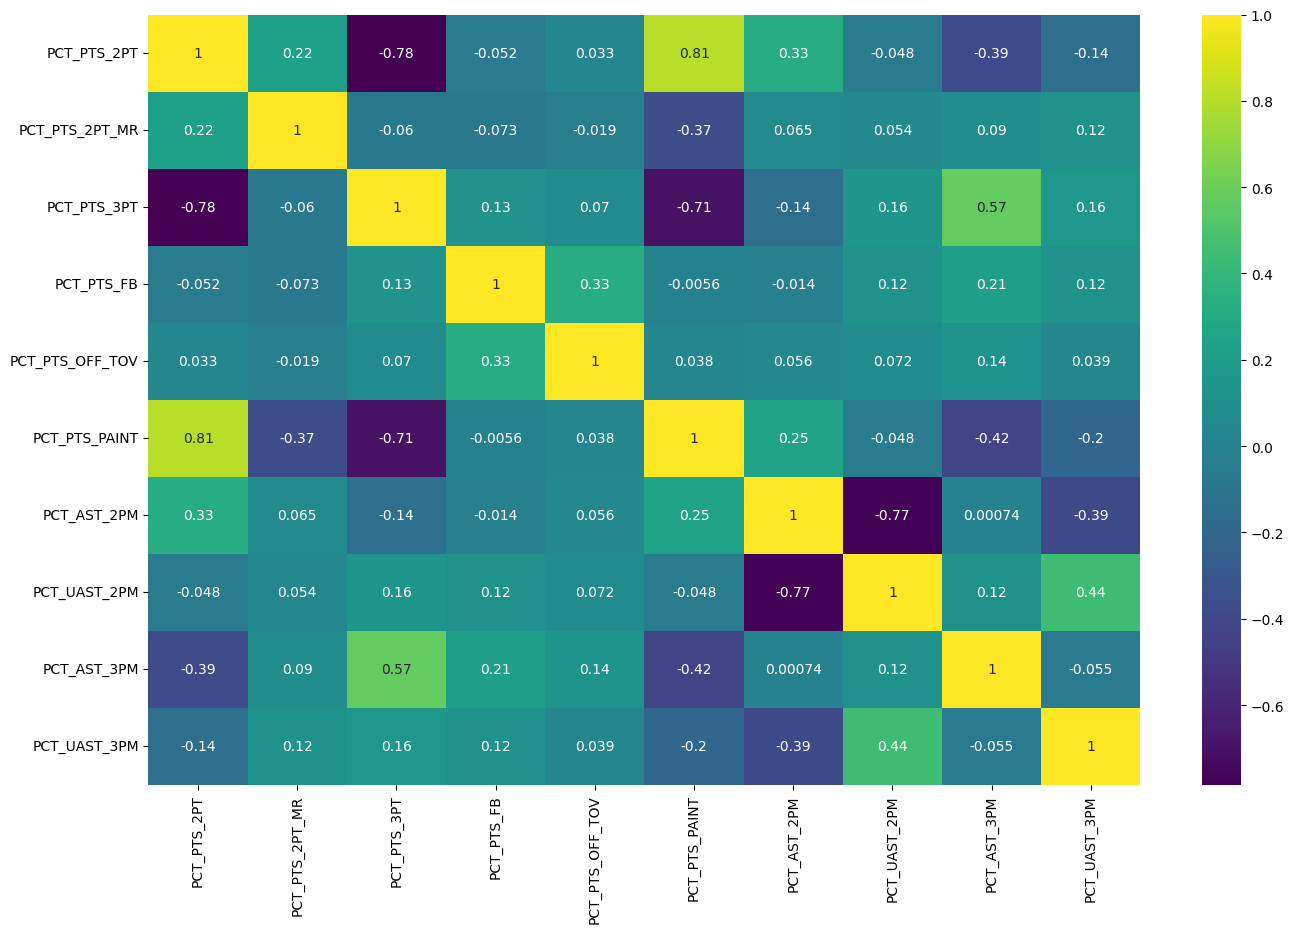

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.heatmap(filtered_shooting_stats.iloc[:,3:].corr(),annot=True, cmap = "viridis")

plt.show()

In [23]:
df_trad.columns

Index(['PLAYER_NAME', 'TEAM_ID', 'GP', 'W', 'L', 'MIN', 'FGM', 'FGA', 'FG3M',
       'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PTS', 'season'],
      dtype='object')

In [9]:
df_shooting.columns

Index(['PLAYER_NAME', 'season', 'MIN', 'PCT_PTS_2PT', 'PCT_PTS_2PT_MR',
       'PCT_PTS_3PT', 'PCT_PTS_FB', 'PCT_PTS_OFF_TOV', 'PCT_PTS_PAINT',
       'PCT_AST_2PM', 'PCT_UAST_2PM', 'PCT_AST_3PM', 'PCT_UAST_3PM'],
      dtype='object')

In [7]:
import pandas as pd
df = pd.read_csv("seasons_scaled/all_seasons_advanced_scaled_filtered.csv",index_col=0)
df
df_trad = pd.read_csv("seasons_scaled/all_seasons_traditional_stats_scaled_filtered.csv",index_col = 0)
df_trad
df_shooting = pd.read_csv("seasons_scaled/all_seasons_shooting_stats_scaled_filtered.csv",index_col=0)

df_shooting
df_final  = df.merge(df_trad.drop(["MIN","GP"],axis = 1) , on =["PLAYER_NAME","season"],how = "inner").merge(df_shooting.drop("MIN",axis = 1), on =["PLAYER_NAME","season"],how = "inner")
df_final

,PLAYER_NAME,TEAM_ABBREVIATION,GP,W_PCT,MIN,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,...,PCT_PTS_2PT,PCT_PTS_2PT_MR,PCT_PTS_3PT,PCT_PTS_FB,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,PCT_UAST_2PM,PCT_AST_3PM,PCT_UAST_3PM
0,AJ Price,IND,44,0.614,12.9,-0.114105,-0.541366,0.283986,1.411702,1.689805,...,-1.234915,0.427861,1.255104,-0.800238,0.356593,-1.425474,-1.487513,1.561907,0.290786,0.988963
1,Aaron Gray,TOR,49,0.347,16.6,-0.444183,0.628530,-0.707048,-0.757885,-0.996896,...,1.248864,-0.974590,-0.982703,-1.049696,-0.598248,1.777632,0.621290,-0.568324,-1.456551,-0.603618
2,Al Harrington,DEN,64,0.563,27.5,1.021364,0.096759,0.620229,-0.467223,-0.673497,...,-0.456493,-0.711146,0.662307,0.316382,0.111762,0.017366,0.261250,-0.204626,0.885980,-0.485211
3,Al Horford,ATL,11,0.636,31.6,1.166598,-0.195715,0.912230,-0.155799,0.209632,...,1.090107,0.133424,-0.982703,-0.883391,-0.892046,0.940784,0.228519,-0.171562,-1.456551,-0.603618
4,Al Jefferson,UTA,61,0.525,34.0,1.193005,0.402527,0.540593,-0.155799,1.030568,...,1.305198,0.815279,-0.967883,-1.311033,-0.414625,0.719549,-0.038003,0.097669,0.933787,-0.603618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14006,Willie Anderson,MIA,28,0.786,10.7,0.172010,0.059360,0.079064,0.610863,0.558055,...,-0.605269,-0.547425,0.582102,-0.672453,0.356504,-0.273091,0.078997,0.026596,1.018657,-0.618025
14007,Willie Burton,ATL,24,0.625,15.9,-0.566065,-0.085469,-0.335144,-0.812587,-1.034840,...,-1.418038,-0.891408,0.453018,-0.887605,-1.032779,-0.866408,0.109777,-0.005334,1.018657,-0.618025
14008,Xavier McDaniel,NJN,62,0.306,18.9,0.172010,-0.121677,0.182616,-0.506809,-0.434619,...,0.773816,1.507653,-0.688086,-0.397536,-0.173429,-0.119647,-0.264712,0.383142,0.544601,0.460800
14009,Yinka Dare,NJN,41,0.293,7.7,0.238106,-0.097538,0.219599,-1.265983,-1.346494,...,0.238961,-0.679726,-0.910111,-1.533063,-1.075747,0.621999,0.120037,-0.015977,-1.351625,-0.618025


In [45]:
# -----------------------------
# 1. Imports
# -----------------------------
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler        # NEW
from sklearn.neighbors import NearestNeighbors

# -----------------------------
# 2. Parameters
# -----------------------------
TARGET_NAME  = "Victor Wembanyama"
TARGET_SEAS  = 2025
K            = 5
MIN_MINUTES  = 20
MINUTES_COL  = "MIN"

feature_cols = [
    "OFF_RATING", "DEF_RATING",
    "AST_PCT","AST_RATIO","OREB_PCT","DREB_PCT",
     "EFG_PCT", "TS_PCT","TM_TOV_PCT",
    "USG_PCT", "PACE", "POSS",
    "FGM", "FGA","PTS","BLK",'PCT_PTS_2PT_MR',"FG3A",
       'PCT_PTS_3PT',  'PCT_PTS_PAINT',
       'PCT_AST_2PM', 'PCT_UAST_2PM', 'PCT_AST_3PM', 'PCT_UAST_3PM',"PCT_PTS_2PT"
]

# -----------------------------
# 3. Build masks
# -----------------------------
mask_minutes = df_final[MINUTES_COL] >= MIN_MINUTES
mask_me      = (df_final["PLAYER_NAME"] == TARGET_NAME) & (df_final["season"] == TARGET_SEAS)

if mask_me.sum() != 1:
    raise ValueError(f"Expected exactly one row for {TARGET_NAME}-{TARGET_SEAS}, got {mask_me.sum()}.")
if not mask_minutes[mask_me].iloc[0]:
    raise ValueError(f"{TARGET_NAME} played <{MIN_MINUTES} min in {TARGET_SEAS}.")

# -----------------------------
# 4. Prepare query & pool
# -----------------------------
# query row (still a 2-D array for scikit-learn)
query_vec = (
    df_final.loc[mask_me, feature_cols]
    
      .to_numpy()
)

# pool = everyone else, minutes-qualified
mask_pool  = (df_final["PLAYER_NAME"] != TARGET_NAME) & mask_minutes
df_pool    = (
    df_final.loc[mask_pool, feature_cols]
)
X_pool     = df_pool.to_numpy()

# -----------------------------
# 5. Scale
# -----------------------------


# -----------------------------
# 6. k-NN on scaled data
# -----------------------------
knn = NearestNeighbors(metric="cosine", n_neighbors=K)
knn.fit(X_pool)

dists, idxs   = knn.kneighbors(query_vec)
similar       = df_final.loc[mask_pool].iloc[idxs[0]].copy()
similar["cosine_distance"] = dists[0]

print(similar[["PLAYER_NAME", "season", "cosine_distance"]])


              PLAYER_NAME  season  cosine_distance
10384          Josh Smith    2007         0.072579
13339  Kristaps Porziņģis    2018         0.080833
4519        Chet Holmgren    2024         0.085242
9056   Kristaps Porziņģis    2017         0.085377
1266   Kristaps Porziņģis    2022         0.088634


/Users/ozcankures/Desktop/projeler-genel/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ozcankures/Desktop/projeler-genel/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ozcankures/Desktop/projeler-genel/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
